In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# API Key
from config import apikey

In [47]:
stocks_df=pd.read_csv("500_stock_export.csv")
stocks_df=pd.DataFrame(stocks_df)
stocks_df.head()

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.09,173.15,...,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68,14.14
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.28,52.08,...,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49,4.02
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.66,83.74,...,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65,0.34
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.75,85.21,...,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37,-10.71
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.22,189.70,...,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51,23.13


In [50]:
hardcode_weeks = ["2019-10-04", "2019-10-11","2019-10-18", "2019-10-25", "2019-11-01", "2019-11-08",
                  "2019-11-15", "2019-11-22", "2019-11-29", "2019-12-06", "2019-12-13", "2019-12-20",
                  "2019-12-27", "2020-01-03", "2020-01-10", "2020-01-17", "2020-01-24", "2020-01-31",
                  "2020-02-07", "2020-02-14", "2020-02-21", "2020-02-28", "2020-03-06", "2020-03-13"]

In [52]:
edit_df = stocks_df.copy()
edit_df.replace('', np.nan, inplace=True)
edit_df.dropna(how="any", inplace = True)
edit_df["Difference"] = edit_df[hardcode_weeks[0]]-edit_df[hardcode_weeks[-1]]

In [78]:
min_df = edit_df.loc[edit_df["Difference"] == edit_df["Difference"].min()]
min_df

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
361,392,REGN,Regeneron,Health Care,282.93,300.77,300.19,306.21,310.48,341.79,...,385.94,345.28,337.94,381.87,399.55,403.15,444.57,494.43,465.55,-182.62


In [88]:
hc_df = edit_df.loc[edit_df['Sector'] == 'Consumer Discretionary']

In [89]:
date_df=hc_df.set_index(['Symbol'])
date_df=date_df.dropna()
date_df=date_df.drop(['Unnamed: 0', 'Sector', 'Name'], axis=1)
date_df.head()

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Symbol,,,,,,,,,,,,,,,,,,,,,
AAP,159.94,158.56,163.50,165.56,164.82,167.40,162.66,157.87,157.08,154.62,...,151.05,141.68,131.75,132.93,133.59,140.61,132.98,127.91,113.69,46.25
AMZN,1739.65,1731.92,1757.51,1761.33,1791.44,1785.88,1739.49,1745.72,1800.80,1751.60,...,1864.72,1861.64,2008.72,2079.28,2134.87,2095.97,1883.75,1901.09,1785.00,-45.35
APTV,83.43,86.26,88.96,89.58,92.35,96.88,92.31,91.47,93.88,93.77,...,91.53,91.54,84.79,87.13,88.32,90.07,78.11,76.29,66.47,16.96
AZO,1060.33,1085.97,1110.00,1129.47,1156.28,1165.86,1171.88,1163.87,1177.92,1172.66,...,1154.58,1140.23,1057.96,1058.91,1053.21,1068.03,1032.51,1060.31,1012.73,47.60
BBY,66.89,69.53,70.52,73.15,72.92,76.85,77.09,72.64,80.64,82.05,...,89.94,89.44,84.69,87.02,90.21,90.26,75.65,73.82,61.06,5.83


In [90]:
date_df=date_df.swapaxes("index", "columns") 
date_df=date_df.reset_index()
date_df=date_df.rename(columns={"index": "date_range"})
date_df.head()

Symbol,date_range,AAP,AMZN,APTV,AZO,BBY,BKNG,BWA,KMX,CCL,...,TRIP,FOXA,FOX,ULTA,UAA,UA,VFC,WHR,WYNN,YUM
0,2019-10-04,159.94,1739.65,83.43,1060.33,66.89,1983.20,35.15,85.60,41.14,...,38.980,30.57,30.485,250.60,19.31,17.59,88.69,155.33,108.91,114.66
1,2019-10-11,158.56,1731.92,86.26,1085.97,69.53,1977.18,37.20,90.53,41.55,...,39.110,31.46,31.160,248.46,19.99,18.26,90.89,158.22,112.78,114.45
2,2019-10-18,163.50,1757.51,88.96,1110.00,70.52,2013.53,38.74,94.28,42.79,...,37.415,32.21,31.525,239.92,19.69,17.81,92.47,161.06,113.52,112.30
3,2019-10-25,165.56,1761.33,89.58,1129.47,73.15,2055.93,39.72,94.77,44.57,...,40.320,32.41,31.700,240.90,21.06,19.06,84.15,159.36,120.85,109.10
4,2019-11-01,164.82,1791.44,92.35,1156.28,72.92,2032.02,43.65,94.86,42.95,...,40.400,32.39,31.860,233.11,21.14,18.91,82.89,150.07,123.19,99.65


In [91]:
date = date_df.index.astype('O')

In [92]:
new_dict = {"date_range":[], "value":[]}
for index, row in date_df.iterrows():
    for x in range(len(date_df.columns)-2):
        new_dict["date_range"].append(index)
        new_dict["value"].append(row[x+2])

In [93]:
scatter_df = pd.DataFrame(new_dict)

In [94]:
scatter_df.head()

,date_range,value
0,0,1739.65
1,0,83.43
2,0,1060.33
3,0,66.89
4,0,1983.20


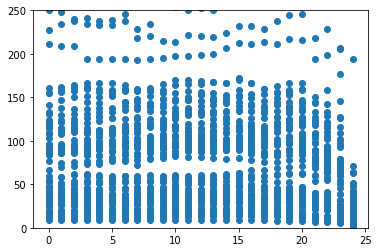

In [99]:
plt.scatter(scatter_df['date_range'],scatter_df['value'])
plt.ylim(0,250)
plt.show()

In [59]:
cleaned_stocks=stocks_df.dropna()
cleaned_stocks=cleaned_stocks.drop(['Unnamed: 0'], axis=1)
cleaned_stocks.head()

sector_df=cleaned_stocks.groupby("Sector").mean()
sector_df.head(11)

,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,2019-12-06,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,583.925556,586.522222,597.758889,606.008889,610.143333,595.255556,586.632222,588.127778,599.860000,596.717778,...,623.423333,621.735556,607.886667,597.035556,614.103333,629.635556,621.171111,561.225556,554.725556,508.078889
Consumer Staples,43.113333,43.300000,43.843333,44.756667,44.676667,45.323333,46.040000,46.183333,46.400000,47.356667,...,47.300000,48.096667,47.780000,46.893333,46.936667,46.193333,45.916667,41.046667,43.850000,41.330000
Energy,20.870000,20.403333,20.720000,21.086667,21.380000,21.683333,21.590000,20.740000,20.213333,19.426667,...,24.910000,24.363333,22.493333,21.063333,21.733333,21.380000,21.273333,18.313333,17.716667,13.056667
Financials,117.370937,117.874375,119.219687,121.005000,123.338750,126.453750,127.121875,126.646875,128.183750,128.476875,...,130.410000,133.862500,133.301250,132.413125,137.343125,139.796875,138.520000,118.713125,116.071875,102.550625
Health Care,121.530625,122.656250,126.126875,132.038750,137.385000,138.171250,140.074375,142.211875,143.589375,143.870625,...,148.285625,148.343125,144.525000,138.301875,145.253750,148.789375,147.857500,132.204375,136.691250,130.002500
Industrials,109.862727,111.503182,110.243182,113.190000,113.852727,115.783636,117.285455,116.260000,116.769091,115.772273,...,113.795455,114.400000,112.650909,108.082727,110.931818,112.840000,110.318182,96.340909,94.969091,79.113636
Information Technology,267.699412,268.885882,271.388235,273.966471,277.060588,284.585294,290.459412,286.165000,290.745882,294.737059,...,312.592059,321.927059,321.238235,313.031765,323.905882,332.062941,324.788529,290.533529,284.257059,265.710588
Materials,116.072500,118.045000,118.252500,118.890000,118.952500,125.082500,126.185000,124.372500,124.535000,122.505000,...,124.720000,130.465000,131.685000,130.602500,136.405000,140.250000,139.552500,121.602500,127.295000,111.072500
Real Estate,138.738333,138.345000,140.053333,138.901667,139.773333,136.005000,139.146667,137.798333,140.048333,140.078333,...,140.776667,144.288333,146.385000,144.790000,147.596667,154.116667,151.168333,135.365000,141.901667,131.563333


In [3]:
sectors = ['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 'Health Care',
          'Industrials', 'Information Technology', 'Materials', 'Real Estate',
          'Telecommunication Services', 'Utilities']

partDf = stocks_df.loc[stocks_df['Sector'] == 'Consumer Discretionary']

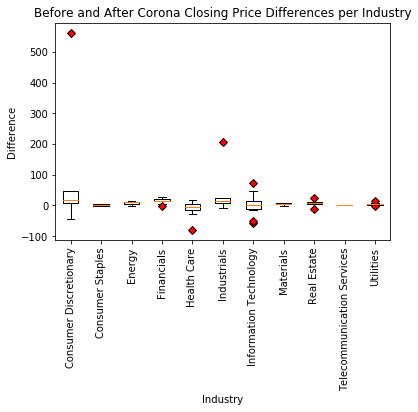

In [5]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Before and After Corona Closing Price Differences per Industry')
ax1.set_ylabel('Difference')
ax1.set_xlabel('Industry')
plt.xticks(rotation=90)
red_diamond = dict(markerfacecolor='r', marker='D')
diffList = []
for sec in sectors:
    partialDf = stocks_df.loc[stocks_df['Sector'] == sec]
    diffs = partialDf["Difference"]
    diffList.append(diffs)
ax1.boxplot(diffList, labels=sectors, flierprops=red_diamond)
plt.show()

In [7]:
partDf.head(20)

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
8,8,AAP,Advance Auto Parts,Consumer Discretionary,159.94,158.56,163.50,165.56,164.82,167.40,...,151.05,141.68,131.75,132.93,133.59,140.61,132.98,127.91,113.69,46.25
29,30,AMZN,Amazon.com Inc.,Consumer Discretionary,1739.65,1731.92,1757.51,1761.33,1791.44,1785.88,...,1864.72,1861.64,2008.72,2079.28,2134.87,2095.97,1883.75,1901.09,1785.00,-45.35
50,53,APTV,Aptiv Plc,Consumer Discretionary,83.43,86.26,88.96,89.58,92.35,96.88,...,91.53,91.54,84.79,87.13,88.32,90.07,78.11,76.29,66.47,16.96
58,61,AZO,AutoZone Inc,Consumer Discretionary,1060.33,1085.97,1110.00,1129.47,1156.28,1165.86,...,1154.58,1140.23,1057.96,1058.91,1053.21,1068.03,1032.51,1060.31,1012.73,47.60
67,71,BBY,Best Buy Co. Inc.,Consumer Discretionary,66.89,69.53,70.52,73.15,72.92,76.85,...,89.94,89.44,84.69,87.02,90.21,90.26,75.65,73.82,61.06,5.83
72,76,BKNG,Booking Holdings Inc,Consumer Discretionary,1983.20,1977.18,2013.53,2055.93,2032.02,1879.19,...,2054.69,1962.96,1830.55,1909.59,1990.96,1928.72,1695.66,1612.09,1421.33,561.87
73,77,BWA,BorgWarner,Consumer Discretionary,35.15,37.20,38.74,39.72,43.65,46.31,...,41.53,39.24,34.29,33.57,34.15,33.98,31.60,28.87,25.66,9.49
85,91,KMX,Carmax Inc,Consumer Discretionary,85.60,90.53,94.28,94.77,94.86,93.88,...,95.68,96.73,97.04,96.30,98.81,101.21,87.31,85.00,69.19,16.41
86,92,CCL,Carnival Corp.,Consumer Discretionary,41.14,41.55,42.79,44.57,42.95,45.05,...,51.90,47.52,43.53,42.20,42.60,41.69,33.46,27.15,17.58,23.56
